In [78]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error


# URL for the Concrete Compressive Strength dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"

# Load the dataset into a pandas DataFrame

concrete_compressive_strength= pd.read_excel(url)
concrete_compressive_strength.head(50)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


###Exploratory data analysis

In [79]:
concrete_compressive_strength.isnull().sum()

,0
Cement (component 1)(kg in a m^3 mixture),0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),0
Fly Ash (component 3)(kg in a m^3 mixture),0
Water (component 4)(kg in a m^3 mixture),0
Superplasticizer (component 5)(kg in a m^3 mixture),0
Coarse Aggregate (component 6)(kg in a m^3 mixture),0
Fine Aggregate (component 7)(kg in a m^3 mixture),0
Age (day),0
"Concrete compressive strength(MPa, megapascals)",0


In [80]:
concrete_compressive_strength.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [81]:
concrete_compressive_strength.dtypes

,0
Cement (component 1)(kg in a m^3 mixture),float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture),float64
Fly Ash (component 3)(kg in a m^3 mixture),float64
Water (component 4)(kg in a m^3 mixture),float64
Superplasticizer (component 5)(kg in a m^3 mixture),float64
Coarse Aggregate (component 6)(kg in a m^3 mixture),float64
Fine Aggregate (component 7)(kg in a m^3 mixture),float64
Age (day),int64
"Concrete compressive strength(MPa, megapascals)",float64


### Correlation Matrix


Correlation Matrix:
                                                    Cement (component 1)(kg in a m^3 mixture)  \
Cement (component 1)(kg in a m^3 mixture)                                            1.000000   
Blast Furnace Slag (component 2)(kg in a m^3 mi...                                  -0.275193   
Fly Ash (component 3)(kg in a m^3 mixture)                                          -0.397475   
Water  (component 4)(kg in a m^3 mixture)                                           -0.081544   
Superplasticizer (component 5)(kg in a m^3 mixt...                                   0.092771   
Coarse Aggregate  (component 6)(kg in a m^3 mix...                                  -0.109356   
Fine Aggregate (component 7)(kg in a m^3 mixture)                                   -0.222720   
Age (day)                                                                            0.081947   
Concrete compressive strength(MPa, megapascals)                                      0.497833   

        

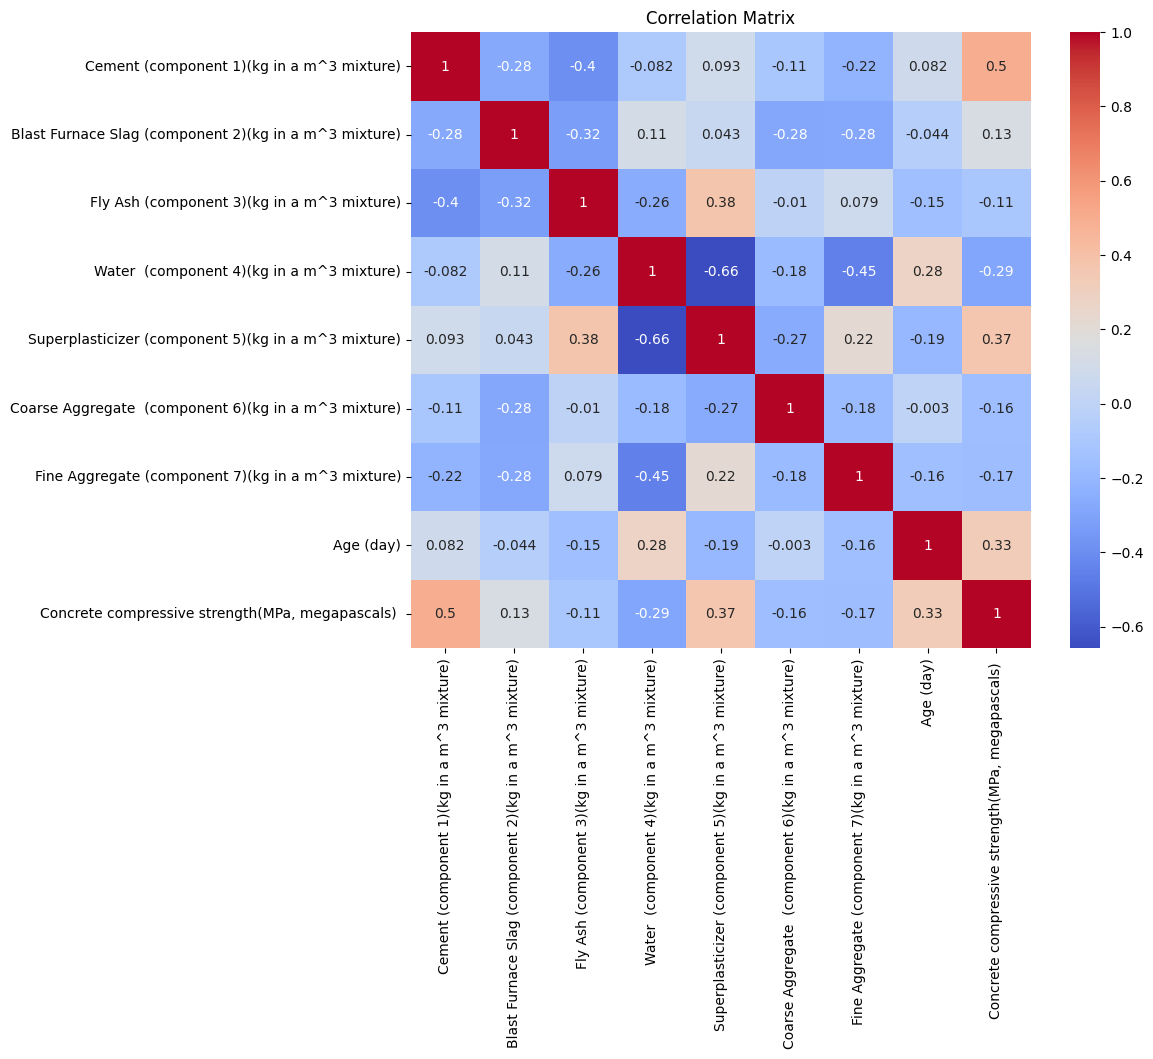

In [82]:
# Compute the correlation matrix
correlation_matrix = concrete_compressive_strength.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix if desired (requires seaborn and matplotlib)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


###ML

In [83]:
X, y = concrete_compressive_strength.iloc[:, :-1], concrete_compressive_strength.iloc[:, -1]  # Features and target
# For your dataset, replace `X` and `y` with your DataFrame columns, e.g., `df.iloc[:, :-1]` and `df.iloc[:, -1]`
X.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [84]:
y.head()

,"Concrete compressive strength(MPa, megapascals)"
0,79.986111
1,61.887366
2,40.269535
3,41.052780
4,44.296075


In [85]:
model_results = []
def evaluate_model_with_kfold(model, X, y, k=5):

    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    kfold_mses = []  # MSE for each fold

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        kfold_mses.append(mse)

    # Calculate mean and standard deviation of MSE
    results = {
        'mean_mse': np.mean(kfold_mses),
        'std_mse': np.std(kfold_mses),
        'kfold_mses': kfold_mses
    }

    return results

####Linear Regression

In [86]:
lr_model = LinearRegression()
lr_results = evaluate_model_with_kfold(lr_model, X, y, k=5)

model_results.append({
        'Model': 'Linear Regression',
        'Mean MSE': lr_results['mean_mse'],
        'Standard Deviation of MSE': lr_results['std_mse'],
        'KFold MSEs': lr_results['kfold_mses']
    })
# Print results for Linear Regression
print("Linear Regression Results:")
print(f"Mean MSE: {lr_results['mean_mse']}")
print(f"Standard Deviation of MSE: {lr_results['std_mse']}")
print(f"MSE for each fold: {lr_results['kfold_mses']}")
print("-" * 30)

Linear Regression Results:
Mean MSE: 111.01086976534187
Standard Deviation of MSE: 17.153892620450357
MSE for each fold: [95.97548435337706, 135.9081286928126, 125.34757953241044, 90.94235983758341, 106.88079641052579]
------------------------------


#### Support Vector Machine

In [87]:
# Evaluate Support Vector Machine (SVM) - Regression (regression)
svm_reg_model = SVR()
svm_reg_results = evaluate_model_with_kfold(svm_reg_model, X, y, k=5)
print("Support Vector Machine (SVR) Results (MSE):")
print(f"Mean MSE: {svm_reg_results['mean_mse']}")
print(f"Standard Deviation of MSE: {svm_reg_results['std_mse']}")
print(f"MSE for each fold: {svm_reg_results['kfold_mses']}")
print("-" * 30)

model_results.append({
        'Model': 'SVR',
        'Mean MSE': svm_reg_results['mean_mse'],
        'Standard Deviation of MSE': svm_reg_results['std_mse'],
        'KFold MSEs': svm_reg_results['kfold_mses']
    })

Support Vector Machine (SVR) Results (MSE):
Mean MSE: 212.0940428385473
Standard Deviation of MSE: 23.570110730043176
MSE for each fold: [197.8921616041982, 251.98335883441368, 218.24783546564848, 211.00748781702907, 181.33937047144684]
------------------------------


#### Decision Tree Regressor

In [88]:
dt_reg_model = DecisionTreeRegressor(random_state=42)
dt_reg_results = evaluate_model_with_kfold(dt_reg_model, X, y, k=5)
print("Decision Tree Regressor Results (MSE):")
print(f"Mean MSE: {dt_reg_results['mean_mse']}")
print(f"Standard Deviation of MSE: {dt_reg_results['std_mse']}")
print(f"MSE for each fold: {dt_reg_results['kfold_mses']}")
print("-" * 30)

model_results.append({
        'Model': 'Decision Tree Regressor',
        'Mean MSE': dt_reg_results['mean_mse'],
        'Standard Deviation of MSE': dt_reg_results['std_mse'],
        'KFold MSEs': dt_reg_results['kfold_mses']
    })

Decision Tree Regressor Results (MSE):
Mean MSE: 44.55556407988705
Standard Deviation of MSE: 12.74203683366083
MSE for each fold: [49.730407376948826, 67.28275681944773, 35.974726363104196, 36.920809460216084, 32.8691203797184]
------------------------------


####Multi layer perceptron

In [89]:
mlp_reg_model = MLPRegressor(random_state=42)
mlp_reg_results = evaluate_model_with_kfold(mlp_reg_model, X, y, k=5)
print("MLP Regressor Results (MSE):")
print(f"Mean MSE: {mlp_reg_results['mean_mse']}")
print(f"Standard Deviation of MSE: {mlp_reg_results['std_mse']}")
print(f"MSE for each fold: {mlp_reg_results['kfold_mses']}")
print("-" * 30)

model_results.append({
        'Model': 'MLP Regressor',
        'Mean MSE': mlp_reg_results['mean_mse'],
        'Standard Deviation of MSE': mlp_reg_results['std_mse'],
        'KFold MSEs': mlp_reg_results['kfold_mses']
    })

MLP Regressor Results (MSE):
Mean MSE: 71.08075125488514
Standard Deviation of MSE: 15.337307819693674
MSE for each fold: [61.444935476485746, 88.33476732567607, 60.63467767602174, 54.1576195307863, 90.83175626545594]
------------------------------


In [90]:
results_df = pd.DataFrame(model_results)
results_df

,Model,Mean MSE,Standard Deviation of MSE,KFold MSEs
0,Linear Regression,111.010870,17.153893,"[95.97548435337706, 135.9081286928126, 125.347..."
1,SVR,212.094043,23.570111,"[197.8921616041982, 251.98335883441368, 218.24..."
2,Decision Tree Regressor,44.555564,12.742037,"[49.730407376948826, 67.28275681944773, 35.974..."
3,MLP Regressor,71.080751,15.337308,"[61.444935476485746, 88.33476732567607, 60.634..."
